In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
from glob import glob
import os
import numpy as np


In [9]:
# Load data
judge = 'Meta-Llama-3.1-70B-Instruct'
dataset = 'sigma_30k'

files = glob(os.path.join("output", f'judge_{judge}/*.csv'))

data = pd.DataFrame()
for file in files:
    if dataset in file:
        with open(file) as f:
            data = pd.concat((data, pd.read_csv(f)))

data['winner'] =  [row['winner'].replace('Translation (a', row['model1']).replace('Translation (b', row['model2']) 
                   if pd.notna(row['winner']) else np.nan
                   for i, row in data.iterrows()]
data['model_v_model'] = data['model1'] + ' vs ' + data['model2']
data = data.reset_index(drop=True)
data['normalized_model_v_model'] = data['model_v_model'].apply(lambda x: ' vs '.join(sorted(x.split(' vs '))))

Text(0.5, 0, 'Proportion')

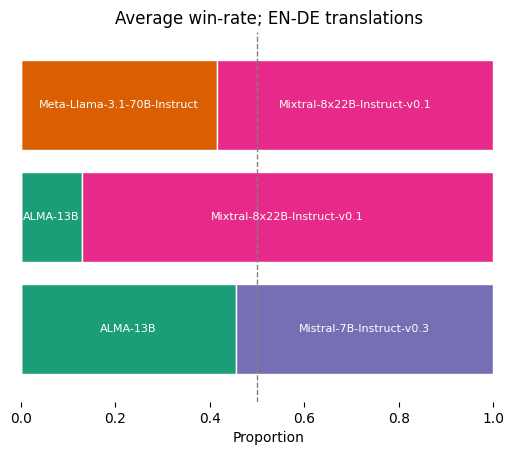

In [10]:
language = 'DE'
used_data = data[data['language'] == language]

counts = pd.crosstab(used_data['normalized_model_v_model'], used_data['winner'], normalize='index')

# Plot:
palette = sns.color_palette("Dark2", len(counts.columns))
ax = counts.plot(kind='barh', stacked=True, color=palette, edgecolor='white', linewidth=1, width=0.8, legend=False)

# Annotations:
for i, (index, row) in enumerate(counts.iterrows()):
    cumulative_width = 0  # Track the width as we go across each bar
    for j, (winner, proportion) in enumerate(row.items()):
        if proportion > 0:
            ax.text(
                cumulative_width + proportion / 2, i,  # Center of the current bar segment
                winner, ha='center', va='center', fontsize=8, color='white'
            )
            cumulative_width += proportion  # Update the cumulative width for the next segment

plt.axvline(0.5, color='grey', linestyle='--', linewidth=1)

sns.despine(bottom=True, left=True)
plt.title(f'Average win-rate; EN-{language} translations')
plt.ylabel('')
plt.yticks([])
plt.xlabel("Proportion")
